In [1]:
import pandas as pd
df = pd.read_csv('Data/ozone2.csv')
df.head(3)

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,1,190.0,7.4,67,41,0
1,5,2,118.0,8.0,72,36,0
2,5,3,149.0,12.6,74,12,0


In [2]:
df.Result.value_counts()

Result
1    81
0    72
Name: count, dtype: int64

<Axes: xlabel='Result', ylabel='count'>

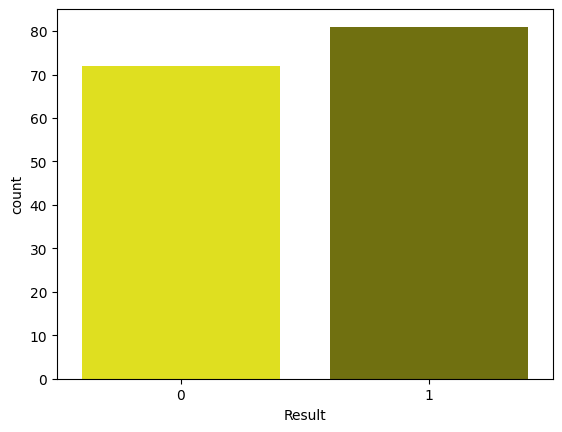

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
colors = ['yellow','olive']
sns.countplot(x="Result", data=df, palette=colors)

In [5]:
df.columns

Index(['Month', 'Day', 'Solar.R', 'Wind', 'Temp', 'Ozone', 'Result'], dtype='object')

In [6]:
cols = ['Solar.R', 'Wind', 'Temp']
x = df[cols]
y = df['Result']


array([[<Axes: xlabel='Solar.R', ylabel='Solar.R'>,
        <Axes: xlabel='Wind', ylabel='Solar.R'>,
        <Axes: xlabel='Temp', ylabel='Solar.R'>],
       [<Axes: xlabel='Solar.R', ylabel='Wind'>,
        <Axes: xlabel='Wind', ylabel='Wind'>,
        <Axes: xlabel='Temp', ylabel='Wind'>],
       [<Axes: xlabel='Solar.R', ylabel='Temp'>,
        <Axes: xlabel='Wind', ylabel='Temp'>,
        <Axes: xlabel='Temp', ylabel='Temp'>]], dtype=object)

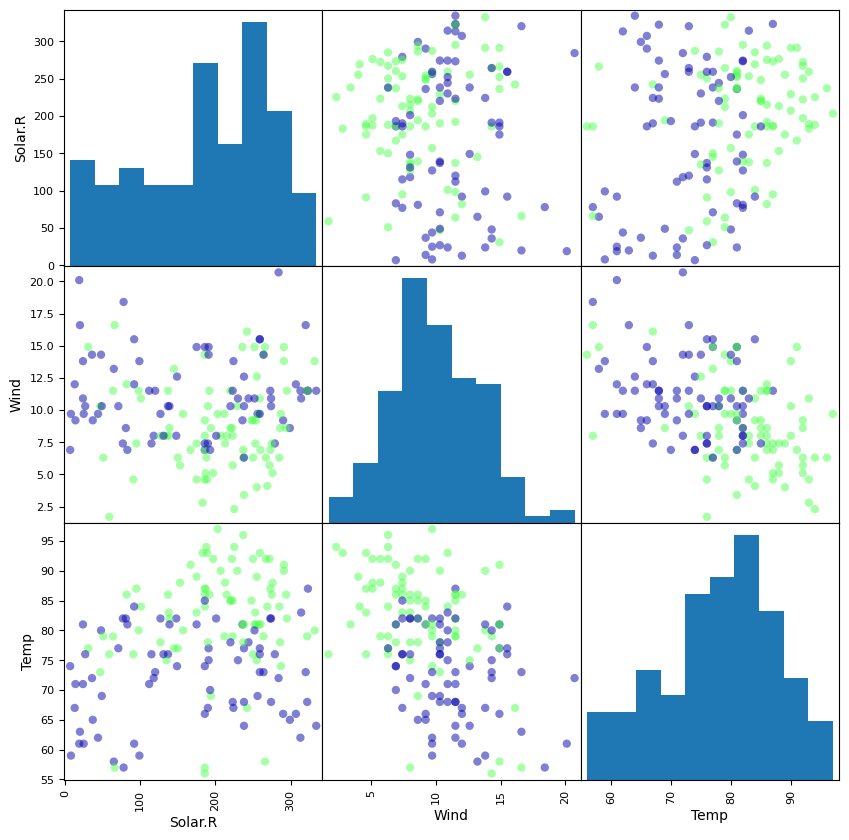

In [8]:
import mglearn
pd.plotting.scatter_matrix(x, c=y, figsize = (10,10), marker='o', cmap=mglearn.cm3)

array([[<Axes: xlabel='Solar.R', ylabel='Solar.R'>,
        <Axes: xlabel='Wind', ylabel='Solar.R'>,
        <Axes: xlabel='Temp', ylabel='Solar.R'>],
       [<Axes: xlabel='Solar.R', ylabel='Wind'>,
        <Axes: xlabel='Wind', ylabel='Wind'>,
        <Axes: xlabel='Temp', ylabel='Wind'>],
       [<Axes: xlabel='Solar.R', ylabel='Temp'>,
        <Axes: xlabel='Wind', ylabel='Temp'>,
        <Axes: xlabel='Temp', ylabel='Temp'>]], dtype=object)

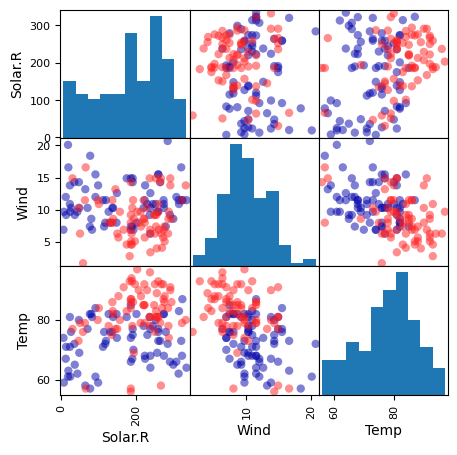

In [20]:
pd.plotting.scatter_matrix(x, c=y, figsize = (5,5), marker='o', cmap=mglearn.cm2)

In [9]:
# undersampling
from imblearn.under_sampling import RandomUnderSampler
x_sample, y_sample = RandomUnderSampler(random_state = 0).fit_resample(x,y)
x_samp = pd.DataFrame(data=x_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns = ['Result'])
df_samp = pd.concat([x_samp, y_samp], axis = 1)
df_samp.Result.value_counts()

Result
0    72
1    72
Name: count, dtype: int64

In [10]:
x = x_samp[cols]
y = y_samp['Result']

from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.2, random_state=10)

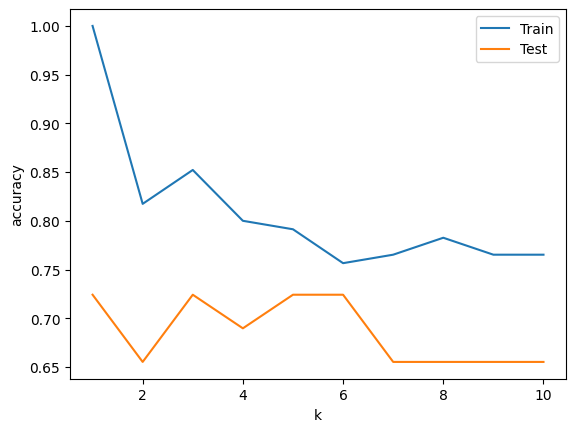

In [13]:
from sklearn.neighbors import KNeighborsClassifier
train_rate = []
test_rate = []

# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다.
# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함
# 1 에서 10 까지 n_neighbors 를 적용

neighbors = range(1,11)

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_tr, y_tr)
    train_rate.append(knn.score(x_tr, y_tr))
    test_rate.append(knn.score(x_ts, y_ts))

plt.rcParams['font.size'] = 10
plt.plot(neighbors, train_rate, label='Train')
plt.plot(neighbors, test_rate, label='Test')
plt.ylabel('accuracy')
plt.xlabel('k')
plt.legend()

In [14]:
import numpy as np
max_rate = max(test_rate)
idx = np.argmax(test_rate)
print('최적의 k: ', idx+1)   

# 학습용 데이터셋의 경우 이웃이 1개일 때 100% 예측
# 이웃의 수가 늘어나면 학습용 데이터셋의 경우 모델이 단순해지고 정확도는 줄어든다.

최적의 k:  1


In [21]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_tr, y_tr)
pred = model.predict(x_ts)
print('학습용: ', model.score(x_tr, y_tr))
print('검증용: ', model.score(x_ts, y_ts))   # overfitting

학습용:  1.0
검증용:  0.7241379310344828


In [17]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_tr, y_tr)
pred = model.predict(x_ts)
print('학습용: ', model.score(x_tr, y_tr))
print('검증용: ', model.score(x_ts, y_ts))

학습용:  0.7913043478260869
검증용:  0.7241379310344828


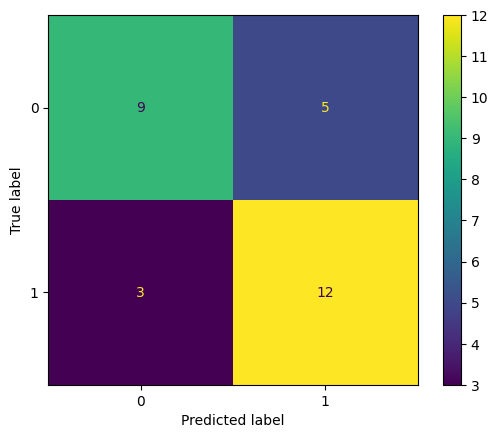

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_ts, pred), display_labels=model.classes_).plot()